In [1]:
from crossword_solver.solver_utils import find_whole_crossword_candidates
from crossword_solver.crossword_solver import solve_crossword
from crossword_solver.crossword_detection import detect_crossword_from_file
from crossword_solver.square_classification import SquareType
from crossword_solver.paths import FONT_PATH
from copy import deepcopy
import matplotlib.pyplot as plt 
import numpy as np
import cv2
from PIL import ImageFont, ImageDraw, Image
path = 'C:/Users/ianigol/Documents/MAGISTER/ristsonalahendaja/crossword_solver/data/pictures/ristsona_2.png'

Resource 'estwordnet_2023-07-20' has already been downloaded.
INFO:keyedvectors.py:2047: loading projection weights from C:/Users/ianigol/Documents/MAGISTER/ristsonalahendaja/crossword_solver/data\lemmas.cbow.s100.w2v.bin
INFO:utils.py:448: KeyedVectors lifecycle event {'msg': 'loaded (441391, 100) matrix of type float32 from C:/Users/ianigol/Documents/MAGISTER/ristsonalahendaja/crossword_solver/data\\lemmas.cbow.s100.w2v.bin', 'binary': True, 'encoding': 'utf8', 'datetime': '2024-05-08T16:38:08.753359', 'gensim': '4.3.2', 'python': '3.10.13 | packaged by Anaconda, Inc. | (main, Sep 11 2023, 13:24:38) [MSC v.1916 64 bit (AMD64)]', 'platform': 'Windows-10-10.0.19045-SP0', 'event': 'load_word2vec_format'}


In [2]:
def show_image(image):
    correct_colors = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    plt.axis('off')
    plt.imshow(correct_colors)
    plt.show()

def prepare_solution_image(crossword):
    font = ImageFont.truetype(FONT_PATH, 25)
    image = deepcopy(crossword.image)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    pil_image = Image.fromarray(image)    
    for gs in crossword.grid.flatten():
        if gs.type == SquareType.EMPTY:
            t = crossword.matrix[gs.grid_x, gs.grid_y].upper()
            if t != '_':
                draw = ImageDraw.Draw(pil_image)
                draw.text((gs.x_min+20,gs.y_max-45), t, font=font, fill='#000')
    image = np.asarray(pil_image)
    image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
    return image 

In [3]:
crossword = detect_crossword_from_file(path)
print("Crossword detected")
find_whole_crossword_candidates(crossword)
print("Candidates found")
results = solve_crossword(crossword)
print("Crossword solutions found")

Crossword detected
Candidates found
Crossword solutions found


In [4]:
sort_by_intersections = sorted(results, key=lambda x: x[2], reverse = True)[:10]
sort_by_weight = sorted(sort_by_intersections, key=lambda x: x[1], reverse = True)[:10]
final_sort = sorted(sort_by_weight, key=lambda x: x[2], reverse = True)[:3]

In [5]:
solved_crossword = deepcopy(crossword)
solved_crossword.matrix = final_sort[0][0]

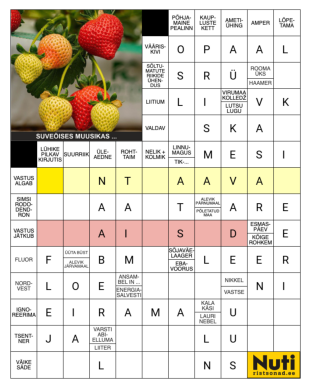

In [6]:
solution_image = prepare_solution_image(solved_crossword)
show_image(solution_image)

In [ ]:
def plot_square_types(crossword):
    font = cv2.FONT_HERSHEY_SIMPLEX   
    fontScale = 1   
    color = (0, 255, 0) 
    thickness = 2
    
    type_to_text = {
        SquareType.HINT : "V",
        SquareType.MULTIHINT : "W",
        SquareType.IRRELEVANT : "X",
        SquareType.EMPTY : "0",
    }

    plotting_image = deepcopy(crossword.image)
    plotting_image = cv2.cvtColor(plotting_image, cv2.COLOR_BGR2GRAY)
    for gs in crossword.grid.flatten():
        t = type_to_text[gs.type]
        plotting_image = cv2.circle(plotting_image, (gs.x_min,gs.y_min), radius=3, color=(0, 0, 0), thickness=-1)
        plotting_image = cv2.putText(plotting_image, t, (gs.x_min+20,gs.y_max-20), font,  fontScale, color, thickness, cv2.LINE_AA)
    return plotting_image 

image = plot_square_types(solved_crossword)

In [ ]:
show_image(image)